In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [157]:
#import the file where a third of the NaN values were removed from the target variable
nn_df = pd.read_csv('../capstone_data/NoNaN_df.csv', dtype = str)
num_col = nn_df.drop(columns = ['Zipcode', 'Year', 'County', 'Area']).columns
nn_df[num_col] = nn_df[num_col].apply(pd.to_numeric, errors = 'coerce')

In [158]:
df = pd.read_csv('../capstone_data/processed_df.csv', dtype = str)

df[num_col] = df[num_col].apply(pd.to_numeric, errors = 'coerce')

In [159]:
#df = df.apply(pd.to_numeric, errors = 'coerce')

df = df.drop(columns = ['Breweries_All','Percent GDP_1','Percent GDP_15', 'Percent GDP_17', 'Percent GDP_18', 'Percent GDP_24', 
                                      'Percent GDP_3', 'Percent GDP_30', 'Percent GDP_38', 'Percent GDP_4',
                                     'Percent GDP_40', 'Percent GDP_46', 'Percent GDP_52', 'Percent GDP_54', 
                                     'Percent GDP_57', 'Percent GDP_58','Percent GDP_6', 'Percent GDP_64', 'Percent GDP_66', 
                                      'Percent GDP_67', 'Percent GDP_68', 'Percent GDP_71', 'Percent GDP_76','Percent GDP_80',
                                      'Percent GDP_77', 'Percent GDP_78', 'Percent GDP_79', 'Percent GDP_83', 'Percent GDP_84',
                                      'Percent GDP_85', 'Percent GDP_65'])

nn_df = nn_df.drop(columns = ['Breweries_All','Percent GDP_1','Percent GDP_15', 'Percent GDP_17', 'Percent GDP_18', 'Percent GDP_24', 
                                      'Percent GDP_3', 'Percent GDP_30', 'Percent GDP_38', 'Percent GDP_4',
                                     'Percent GDP_40', 'Percent GDP_46', 'Percent GDP_52', 'Percent GDP_54', 
                                     'Percent GDP_57', 'Percent GDP_58','Percent GDP_6', 'Percent GDP_64', 'Percent GDP_66', 
                                      'Percent GDP_67', 'Percent GDP_68', 'Percent GDP_71', 'Percent GDP_76','Percent GDP_80',
                                      'Percent GDP_77', 'Percent GDP_78', 'Percent GDP_79', 'Percent GDP_83', 'Percent GDP_84',
                                      'Percent GDP_85', 'Percent GDP_65'])

In [160]:
#create remove outlier function
def remove_outliers(df, df_target, low, high):
    quant_df = df_target.quantile([low, high])
    for col in quant_df.columns:
        df = df.loc[(df[col] < quant_df[col][high])& (df[col]> quant_df[col][low])]
    
    return df

In [161]:
#remove outliers from the age, income, gdp, and population columns

percents = [col for col in nn_df if col.startswith(('Percents', 'all_age_median','female_age_median', 'male_age_median', 'GDP_per_capita',
                      'Income_Median', 'Income_Mean', 'Population' ))]
df_target = nn_df[percents]

nn_df = remove_outliers(nn_df, df_target,.025, .975 )

In [163]:
#do the same for final df

df_t = df[percents]

#do the same for regular df

df = remove_outliers(df, df_t, .025, .975)

In [162]:
df.drop(columns = ['level_0', 'index'], inplace = True)

In [1]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharey = False, figsize = (20, 10))
fig.suptitle('Features by Zipcode')

x_a = nn_df['all_age_median']
x_f = nn_df['female_age_median']
x_m = nn_df['male_age_median']
y = nn_df['Breweries_Small']
z_GDP = nn_df['GDP_per_capita']
x_GDP = nn_df['GDP_per_capita']

a = ax1.scatter(x_a, y, s = (z_GDP/8000)**3,c = z_GDP, cmap = "viridis", alpha = 0.4, edgecolors = 'grey', linewidth = 1)
ax1.set_xlabel('Median Age')
ax1.set_ylabel("Number of Small Breweries")
cbar1 = fig.colorbar(a,ax = ax1, pad = .01)
cbar1.set_label('GDP per Capita')
cbar1.ax.set_yticklabels(['40k','45k','50k','55k','60k'])
#bar1.make_axes(location = 'left')


z_age = nn_df['all_age_median']

b = ax2.scatter(x_GDP, y, s = z_age*10, c = z_age, cmap = "viridis", alpha = 0.4, edgecolors = 'grey', linewidth = 1)
ax2.set_xlabel('GDP per capita')
ax2.set_ylabel("Number of Small Breweries")
cbar2 = fig.colorbar(b, ax = ax2, pad = .01)
cbar2.set_label('Median Age')
#cbar2.ax.set_yticklabels(['40k','45k','50k','55k','60k'])
#bar1.make_axes(location = 'left')


x_imn = nn_df.Income_Mean
y = nn_df["Breweries_Small"]

c = ax3.scatter(x_imn, y, s = z_age*10, c = z_age, cmap = "viridis", alpha = 0.4, edgecolors = 'grey', linewidth = 1)
ax3.set_xlabel("Income_Mean ")
ax3.set_ylabel("Number of Small Breweries")
cbar2 = fig.colorbar(c, ax = ax3, pad = .01)
cbar2.set_label('Median Age')
#cbar2.ax.set_yticklabels(['40k','45k','50k','55k','60k'])

x = nn_df['Population']
z = nn_df['Population']


d = ax4.scatter(x, y, s = z/200, c = y, cmap = 'viridis',alpha = .4, edgecolors = 'grey', linewidth = 1)

ax4.set_xlabel("Population")
ax4.set_ylabel("Number of Small Breweries")
cbar2 = fig.colorbar(d, ax = ax4, pad = .01)
cbar2.set_label('Number of Small Breweries')
#cbar2.ax.set_yticklabels(['40k','45k','50k','55k','60k'])

plt.tight_layout(pad = 5,w_pad = 1, h_pad = 1)

noticing dark line right around 1 brewery which would seem to indicate there is a a flat line of 1 brewery at higher GDP per capita

noticing steady upward trend until 60,000, want to experiment with previous plot, but this time excluding gdp > 60,000.. 

In [166]:
mean = [col for col in nn_df if col.startswith(('Percent', 'Income_Mean'))]
median = [col for col in nn_df if col.endswith(('median','Median', 'capita'))]
sums = [col for col in nn_df if col.endswith(('Small', 'Medium', 'Large', 'XL', 'All', 'Population'))]

agg_dict = {}

for col in mean:
    agg_dict[col] = "mean"
    
for col in median: 
    agg_dict[col] = "median"

for col in sums:
    agg_dict[col] = "sum"

df = df.groupby(['Area', 'County', 'Year', ]).agg(agg_dict)
nn_df = nn_df.groupby(['Area',  'County', 'Year']).agg(agg_dict)

In [167]:
df['Income_gap'] = df['Income_Mean'] - df['Income_Median']

df['smallbrew_per_capita'] = df['Breweries_Small']/df['Population']

nn_df['Income_gap'] = nn_df['Income_Mean'] - nn_df['Income_Median']

nn_df['smallbrew_per_capita'] = nn_df['Breweries_Small']/nn_df['Population']


In [171]:
nn_df = nn_df.fillna(nn_df.groupby(['County']).transform(np.nanmedian))
nn_df = nn_df.fillna(nn_df.groupby(['County']).transform(np.nanmedian))
nn_df = nn_df.fillna(nn_df.groupby(['Year']).transform(np.nanmedian))

In [172]:
df = df.fillna(df.groupby(['County']).transform(np.nanmedian))
df = df.fillna(df.groupby(['County']).transform(np.nanmedian))
df = df.fillna(df.groupby(['Year']).transform(np.nanmedian))

In [150]:
len(nn_df.dropna())

2735

In [151]:
industry_ids = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
                '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40',
                '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
                '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82',
                '83', '84', '85', '86', '87', '88', '89', '90']

industry_names = ['All industry total', 'Private industries', 'Agriculture, forestry, fishing, and hunting', 'Farms', 
                  'Forestry, fishing, and related activities', 'Mining, quarrying, and oil and gas extraction', 
                  'Oil and gas extraction', 'Mining (except oil and gas)', 'Support activities for mining',
                  'Utilities', 'Construction', 'Manufacturing', 'Durable goods manufacturing', 'Wood product manufacturing',
                  'Nonmetallic mineral product manufacturing', 'Primary metal manufacturing', 'Fabricated metal product manufacturing',
                  'Machinery manufacturing', 'Computer and electronic product manufacturing', 
                  'Electrical equipment, appliance, and component manufacturing', 
                  'Motor vehicles, bodies and trailers, and parts manufacturing', 'Other transportation equipment manufacturing',
                  'Furniture and related product manufacturing', 'Miscellaneous manufacturing', 'Nondurable goods manufacturing', 
                  'Food and beverage and tobacco products manufacturing', 'Textile mills and textile product mills', 
                  'Apparel, leather, and allied product manufacturing', 'Paper manufacturing', 'Printing and related support activities',
                  'Petroleum and coal products manufacturing', 'Chemical manufacturing', 'Plastics and rubber products manufacturing',
                  'Wholesale trade', 'Retail trade', 'Transportation and warehousing', 'Air transportation', 'Rail transportation',
                  'Water transportation', 'Truck transportation', ' Transit and ground passenger transportation', 
                  'Pipeline transportation', 'Other transportation and support activities', 'Warehousing and storage', 'Information', 
                  'Publishing industries (except Internet)', 'Motion picture and sound recording industries', 
                  'Broadcasting (except Internet) and telecommunications', 'Data processing, hosting, and other information services', 
                  'Finance, insurance, real estate, rental, and leasing', 'Finance and insurance', 
                  'Monetary Authorities- central bank, credit intermediation, and related services', 
                  'Securities, commodity contracts, and other financial investments and related activities', 
                  'Insurance carriers and related activities', 'Funds, trusts, and other financial vehicles', 
                  'Real estate and rental and leasing', 'Real estate', 
                  'Rental and leasing services and lessors of nonfinancial intangible assets', 'Professional and business services', 
                  'Professional, scientific, and technical services', 'Management of companies and enterprises', 
                  'Administrative and support and waste management and remediation services', 'Administrative and support services', 
                  'Waste management and remediation services', 'Educational services, health care, and social assistance', 
                  'Educational services', 'Health care and social assistance', 'Ambulatory health care services', 
                  'Hospitals, nursing, and residential care facilities', 'Social assistance', 
                  'Arts, entertainment, recreation, accommodation, and food services', 'Arts, entertainment, and recreation', 
                  'Performing arts, spectator sports, museums, and related activities', 'Amusement, gambling, and recreation industries', 
                  'Accommodation and food services', 'Accommodation', 'Food services and drinking places', 
                  'Other services (except government and government enterprises)', 'Government and government enterprises', 
                  'Federal civilian', 'Military', 'State and local', 'Natural resources and mining', 'Trade', 
                  'Transportation and utilities', 'Private goods-producing industries', 'Private services-providing industries']

In [174]:
santa_cruz = nn_df.loc['California','087']

In [47]:
gdp_columns = [('Percent GDP_' + i) for i in industry_ids]

gdp_dict = dict(zip(gdp_columns, industry_names))

In [48]:
len(df.dropna())

6803

In [126]:
def bubble_compare(df, y_col, columns, bubble_size, divide_by, color_value, colors, alph, bw):

    
    for col in columns:
        
        y1= df[y_col]
        y2 = np.sqrt(y1)
        x = df[col]
        
        z = df[bubble_size]/divide_by
        c = df[color_value]
        
    
        
       
        x2 = df[col]/df[bubble_size]
     
        
        
        margin = (max(x)-min(x))*.02
        
        fig, (ax1, ax2) = plt.subplots(1,2,sharey = False, figsize = (20, 5))
        fig.suptitle(col)
        

        
        #ax1
        ax1.scatter(x, y1, s = z, alpha = alph, c = c, cmap = colors)
        ax1.set_ylabel(y_col)
        ax1.set_xlabel(col)
        
        #ax2
        ax2.scatter(x, y2, s = z, alpha = alph, c = c, cmap = colors)
        ax2.set_ylabel(y_col+' squared')
        ax2.set_xlabel(col)
        #ax2.set_ylim(-.00005, .0006)
        
        
        plt.show()

In [218]:
bubble_compare(nn_df, 'Breweries_Small', ['all_age_median', 'Income_Median', 'Income_gap', 'Population', 'GDP_per_capita', 'Colleges, universities, and professional schools_All', 'Museums_All', 'Sporting goods stores_All'], 'Population', 2000, 'Population', 'viridis',.5, .5)

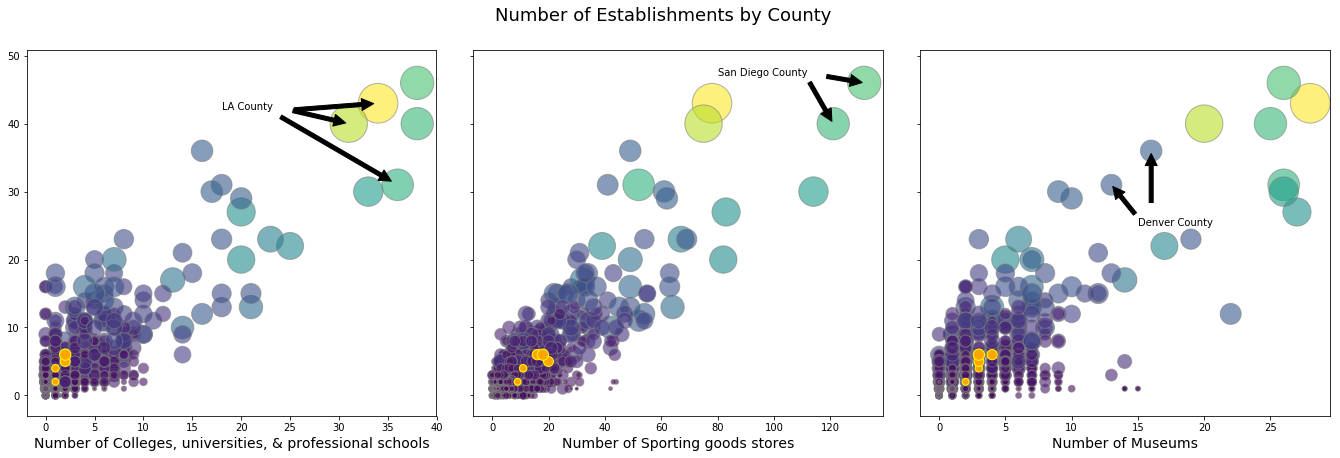

In [281]:
fig, (ax1, ax2 , ax3) = plt.subplots(1,3, sharey = True, figsize = (20,7))
fig.suptitle('Number of Establishments by County', size = 18)

x_sport= nn_df['Sporting goods stores_All']
x_sport_sc = santa_cruz['Sporting goods stores_All']

x_mus = nn_df['Museums_All']
x_mus_sc = santa_cruz['Museums_All']

x_uni = nn_df['Colleges, universities, and professional schools_All']
x_uni_sc = santa_cruz['Colleges, universities, and professional schools_All']

y = nn_df['Breweries_Small']
y_sc = santa_cruz['Breweries_Small']

z = nn_df['Population']
z_sc = santa_cruz['Population']

a = ax1.scatter(x_uni, y, s = (z/1000),c = z, cmap = "viridis", alpha = 0.6, edgecolors = 'grey', linewidth = 1)
ax1.annotate('LA County', xy = (36, 31), xytext = (18, 42), arrowprops = dict(facecolor = 'black', shrink = .05))
ax1.annotate('', xy = (34, 43), xytext = (25, 42), arrowprops = dict(facecolor = 'black', shrink = .05))
ax1.annotate('', xy = (31, 40), xytext = (25, 42), arrowprops = dict(facecolor = 'black', shrink = .05))

ax1.scatter(x_uni_sc, y_sc, s = (z_sc/1000), c = 'orange', edgecolors = 'yellow', linewidth = 1)
ax1.set_xlabel('Number of Colleges, universities, & professional schools', size = 14, horizontalalignment = 'center')
ax1.tick_params(labelsize = 10)



b = ax2.scatter(x_sport, y, s = z/1000, c = z, cmap = "viridis", alpha = 0.6, edgecolors = 'grey', linewidth = 1)
ax2.scatter(x_sport_sc, y_sc, s = (z_sc/1000), c = 'orange', edgecolors = 'yellow', linewidth = 1)
ax2.set_xlabel('Number of Sporting goods stores', size = 14)
ax2.tick_params(labelsize = 10)

ax2.annotate('San Diego County', xy = (121, 40), xytext = (80, 47), arrowprops = dict(facecolor = 'black', shrink = .05))
ax2.annotate('', xy = (132, 46), xytext = (118, 47), arrowprops = dict(facecolor = 'black', shrink = .05))



c = ax3.scatter(x_mus, y, s = z/1000, c = z, cmap = "viridis", alpha = 0.6, edgecolors = 'grey', linewidth = 1)
ax3.scatter(x_mus_sc, y_sc, s = (z_sc/1000), c = 'orange', edgecolors = 'yellow', linewidth = 1)
ax3.set_xlabel("Number of Museums", size = 14)
ax3.tick_params(labelsize = 10)

ax3.annotate('Denver County', xy = (13, 31), xytext = (15, 25), arrowprops = dict(facecolor = 'black', shrink = .05))
ax3.annotate('', xy = (16, 36), xytext = (16, 28), arrowprops = dict(facecolor = 'black', shrink = .05))


plt.tight_layout(pad = 5,w_pad = 0, h_pad = 1)
plt.savefig('establishments.png', bbox_inches = 'tight')
plt.show()

In [222]:
too_large = nn_df[nn_df['Breweries_Small']>30]

In [262]:
too_large.head()

Percent GDP_10  Percent GDP_11  Percent GDP_12  \
Area       County Year                                                   
California 037    2013        0.004945        0.036028        0.109927   
                  2015        0.004945        0.036028        0.109927   
                  2016        0.004945        0.036028        0.109927   
           073    2015        0.013269        0.032453        0.107254   
                  2016        0.013239        0.035084        0.101591   

                        Percent GDP_13  Percent GDP_2  Percent GDP_25  \
Area       County Year                                                  
California 037    2013        0.082869       0.911633        0.030612   
                  2015        0.082869       0.911633        0.030612   
                  2016        0.082869       0.911633        0.030612   
           073    2015        0.070932       0.800124        0.035558   
                  2016        0.072696       0.796350        0.029100   

                        Percent GDP_34  Percent GDP_35  Percent GDP_36  \
Area       County Year                                                   
California 037    2013        0.069219        0.067354        0.029869   
                  2015        0.069219        0.067354        0.029869   
                  2016        0.069219        0.067354        0.029869   
           073    2015        0.044416        0.054506        0.008769   
                  2016        0.045281        0.054669        0.008875   

                        Percent GDP_45          ...           Breweries_Small  \
Area       County Year                          ...                             
California 037    2013        0.044632          ...                      31.0   
                  2015        0.044632          ...                      43.0   
                  2016        0.044632          ...                      40.0   
           073    2015        0.043864          ...                      40.0   
                  2016        0.047788          ...                      46.0   

                        Breweries_Medium  Breweries_Large  Breweries_XL  \
Area       County Year                                                    
California 037    2013               2.0              0.0           1.0   
                  2015               2.0              0.0           1.0   
                  2016               2.0              0.0           1.0   
           073    2015               7.0              2.0           0.0   
                  2016               9.0              2.0           1.0   

                        Colleges, universities, and professional schools_All  \
Area       County Year                                                         
California 037    2013                                               36.0      
                  2015                                               34.0      
                  2016                                               31.0      
           073    2015                                               38.0      
                  2016                                               38.0      

                        Colleges, universities, and professional schools_Small  \
Area       County Year                                                           
California 037    2013                                               16.0        
                  2015                                               16.0        
                  2016                                               10.0        
           073    2015                                               21.0        
                  2016                                               20.0        

                        Colleges, universities, and professional schools_Medium  \
Area       County Year                                                            
California 037    2013                                                3.0     

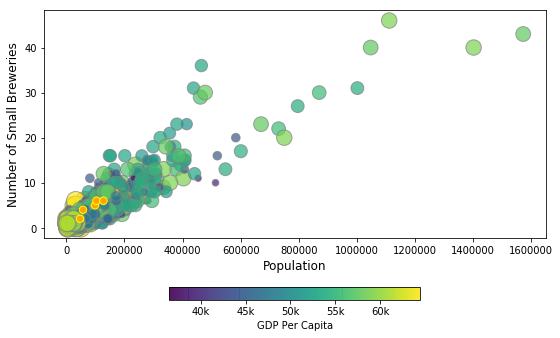

In [335]:
x = nn_df['Population']
x_sc = santa_cruz['Population']
z = nn_df['GDP_per_capita']
z_sc = santa_cruz['GDP_per_capita']
y = nn_df['Breweries_Small']
y_sc = santa_cruz['Breweries_Small']

plt.figure(figsize = (9,6))

plt.scatter(x, y, s = (z/15000)**4, c = z, cmap = 'viridis',alpha = .7,edgecolors = 'grey', linewidth = 1)
#plt.scatter(x_sc, y_sc, s = (z_sc/1000), c = 'orange', edgecolors = 'yellow', linewidth = 1)
cbar = plt.colorbar(orientation = 'horizontal', shrink = .5)

cbar.set_label("GDP Per Capita", size = 10)

cbar.ax.set_xticklabels(['40k', '45k', '50k', '55k', '60k'])
plt.xlabel("Population", size = 12)
plt.ylabel("Number of Small Breweries", size = 12)

test = plt.scatter(x_sc, y_sc, s = (z_sc/1000), c = 'orange', edgecolors = 'yellow', linewidth = 1)

plt.tick_params(labelsize = 10)
plt.savefig('population_smallbrew.png', bbox_inches = 'tight')


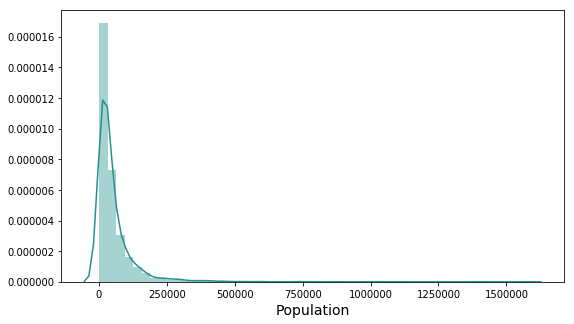

In [310]:
cmap = plt.get_cmap('viridis')
c = cmap(.5)
plt.figure(figsize = (9, 5))

ax = sns.distplot(nn_df['Population'], bins =50, color = c)
ax.set_xlabel('Population', size = 14)

plt.savefig('population_hist.png', bbox_inches = 'tight')

In [17]:
len(df)

6861

In [19]:
len(df.dropna())

3803

In [20]:
df = df.fillna(df.median())



In [77]:
def gdp_subplots_ylim(df, y_col, columns, bubble_size, divide_by, color_value, colors, alph):

    fig, axs = plt.subplots(9,3, figsize=(20, 30), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5, wspace=.5)

    axs = axs.ravel()
        
    for i in range(26):
        column = columns[i]
        x = df[column]/df['Population']
        y = df[y_col]
        z = df[bubble_size]/divide_by
        c = df[color_value]
        
        axs[i].scatter(x, y, s = z, alpha = alph, c = c, cmap = colors)
        axs[i].set_title(column + ': ' + gdp_dict[column])
        axs[i].set_ylim(-.001, .005)
        axs[i].set_xlim(-.001, .005)

In [128]:

to_plot = [col for col in nn_df if col.startswith('Percent')]
len(to_plot)

26

In [90]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer, PowerTransformer, RobustScaler, Normalizer
rs = RobustScaler()
pt = PowerTransformer(method= 'yeo-johnson', standardize=False)
qt = QuantileTransformer(output_distribution= 'normal')
minmax = MinMaxScaler()
ss = StandardScaler()
norm2 = Normalizer(norm = 'l2')
norm1 = Normalizer(norm = 'l1')

scaled = rs.fit_transform(nn_df)

scaled_df = pd.DataFrame(data = scaled)

feature_names = nn_df.columns

scaled_df.columns = feature_names

In [214]:
def gdp_subplots(df, y_col, columns, bubble_size, divide_by, color_value, colors, alph):

    fig, axs = plt.subplots(2,3, figsize=(20, 8), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .3, wspace=.2)

    axs = axs.ravel()
        
    for i in range(len(columns)):
        column = columns[i]
        x = df[column]
        y = df[y_col]
        z = np.sqrt(df[bubble_size])/divide_by
        c = df[color_value]
        
        x_sc = santa_cruz[column]
        y_sc = santa_cruz[y_col]
        z_sc = santa_cruz[bubble_size]/divide_by
        
        
        axs[i].scatter(x, y, s = z, alpha = alph, c = c, cmap = colors)
        axs[i].scatter(x_sc, y_sc, s = (z_sc/1000), c = 'orange', edgecolors = 'yellow', linewidth = 1)
        axs[i].set_title(column + ': ' + gdp_dict[column])
    
        #axs[i].set_ylim(-.0001, .0023)

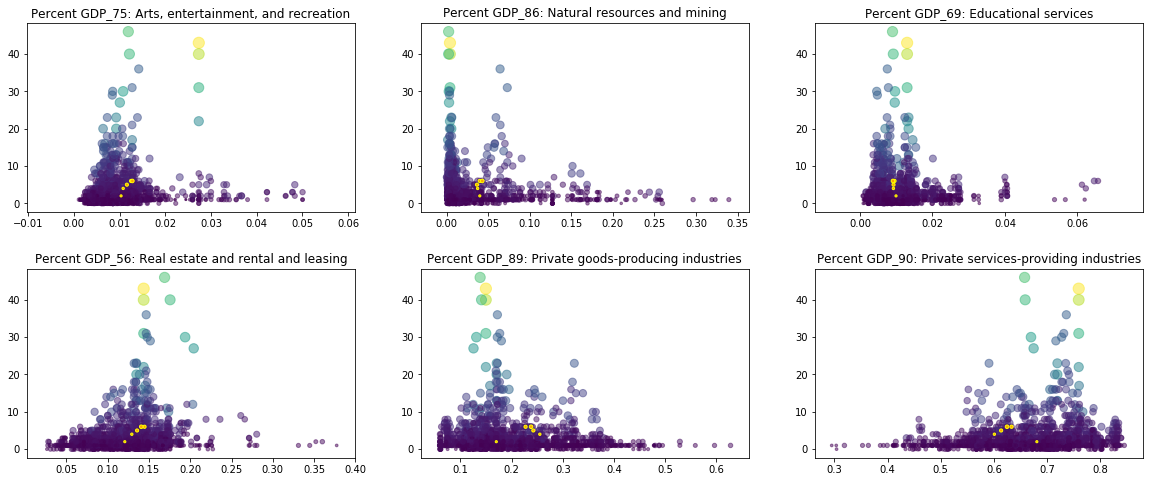

In [215]:
to_plot = ['Percent GDP_75', 'Percent GDP_86', 'Percent GDP_69','Percent GDP_56','Percent GDP_89', 'Percent GDP_90']
gdp_subplots(nn_df, 'Breweries_Small', to_plot, 'Population', 10, 'Population', 'viridis', .5)
plt.savefig('industry_plots.png',bbox_inches = 'tight')

In [61]:
scaled_df.head()

,Percent GDP_10,Percent GDP_11,Percent GDP_12,Percent GDP_13,Percent GDP_2,Percent GDP_25,Percent GDP_34,Percent GDP_35,Percent GDP_36,Percent GDP_45,...,Museums_XL,Breweries_Small,Breweries_Medium,Breweries_Large,Breweries_XL,"Colleges, universities, and professional schools_All","Colleges, universities, and professional schools_Small","Colleges, universities, and professional schools_Medium",Population,Income_gap
0,0.098115,0.205033,0.126307,0.106660,0.892342,0.115200,0.276367,0.257471,0.107677,0.489577,...,0.0,0.038462,0.111111,0.0,0.0,0.090395,0.076336,0.05,0.104511,0.383585
1,0.101386,0.204108,0.082819,0.106660,0.896950,0.115200,0.446657,0.237682,0.114753,0.623752,...,0.0,0.000000,0.000000,0.0,0.0,0.011299,0.000000,0.05,0.052793,0.198171
2,0.101386,0.258072,0.159119,0.084613,0.963989,0.120172,0.390415,0.231652,0.055957,0.294244,...,0.0,0.019231,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.032793,0.225109
3,0.101386,0.223174,0.203467,0.106660,0.525271,0.125342,0.344903,0.409428,0.114753,0.013405,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.010721,0.248187
4,0.126405,0.176712,0.057018,0.106660,0.541301,0.115200,0.164085,0.333998,0.049258,0.148971,...,0.0,0.000000,0.000000,0.0,0.0,0.011299,0.000000,0.05,0.026402,0.302013


In [358]:
def bubble_kde_subplots(df, y_col, columns, bubble_size, divide_by, color_value, colors, alph, bw):
    
   
    for col in columns:
                
       
        x = df[col]
        y = df[y_col]
        z = df[bubble_size]/divide_by
        c = df[color_value]
        
        x_sc = santa_cruz[col]
        y_sc = santa_cruz[y_col]
        z_sc = santa_cruz[bubble_size]/(divide_by)
        
        x_smol = small_pop[col]
        y_smol = small_pop[y_col]
        z_smol = small_pop[bubble_size]/(divide_by/2)
        c_smol = small_pop[color_value]
        
        margin = (max(x)-min(x))*.015
        vmin = min(c)
        vmax = max(c)
            
        fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey = False, sharex = True, figsize = (18, 4))
        fig.suptitle(col, size = 14)
        
        plt.xlim(left = min(x) - margin, right = max(x)+ margin)
        
        
        #ax1.margins()
        ax1.scatter(x, y, s = z, alpha = alph, c = c, cmap = colors, vmin = vmin, vmax = vmax)
        ax1.scatter(x_sc, y_sc, s = (z_sc), c = 'orange', edgecolors = 'yellow', linewidth = 1)
        ax1.set_ylabel(y_col, size = 12)
        ax1.set_xlabel(col,size = 12)
        ax1.tick_params(labelsize = 10)
        
        sns.kdeplot(x, y, ax = ax2, shade = True, cmap = colors, bw = bw)
        ax2.set_ylabel('')
        ax2.set_xlabel(col, size = 12)
        ax2.tick_params(labelsize = 10)
        
        ax3.scatter(x_smol, y_smol, s = z_smol, alpha = alph, c = c_smol, cmap = colors, vmin = vmin, vmax = vmax)
        ax3.scatter(x_sc, y_sc, s = z_sc*2, c = 'orange', edgecolors = 'yellow', linewidth = 1)
        ax3.set_xlabel(col + ' for populations <100,000',size = 12)
        ax3.tick_params(labelsize = 10)
        
        plt.tight_layout(pad = 5, w_pad = .1)
        
        
        
  
    

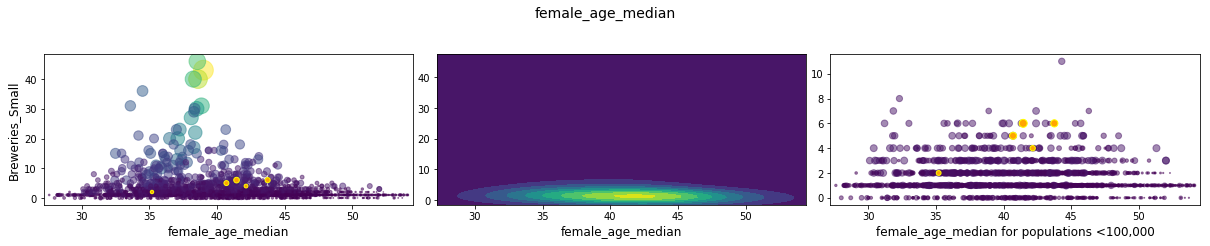

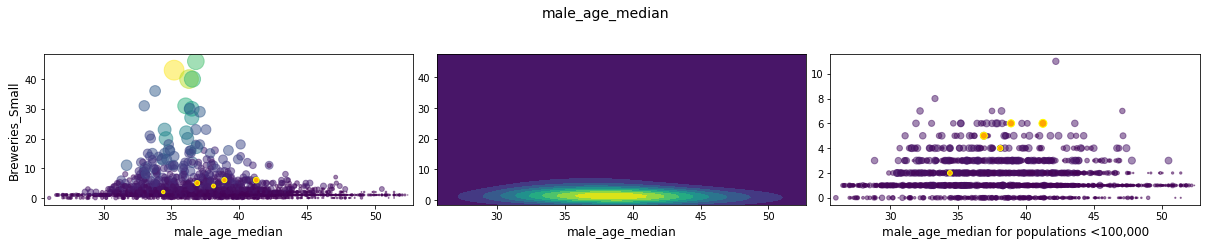

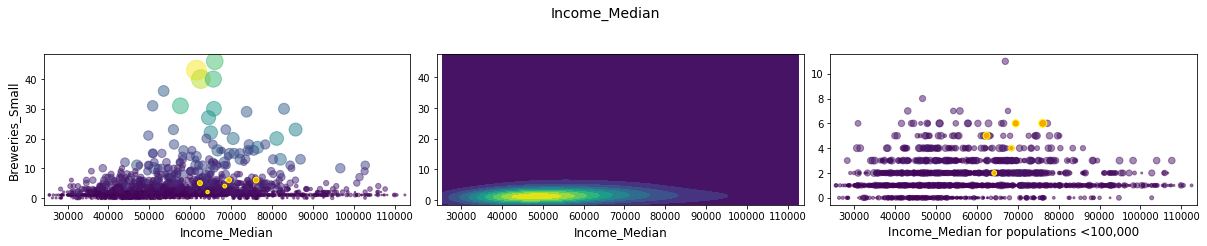

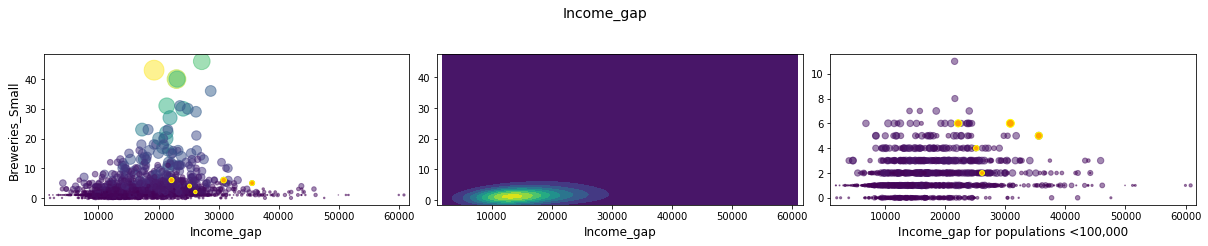

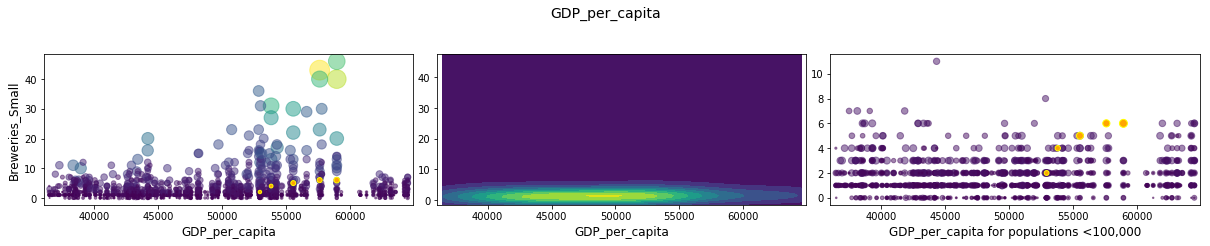

In [359]:
bubble_kde_subplots(nn_df, 'Breweries_Small', ['female_age_median', 'male_age_median', 'Income_Median', 'Income_gap', 'GDP_per_capita'], 'Population', 4000, 'Population', 'viridis',.5, .5)
#plt.savefig('demographic_kdes.png', bbox_inches = 'tight')

In [406]:
small = small_pop[small_pop['Area'].isin(top_ten)]

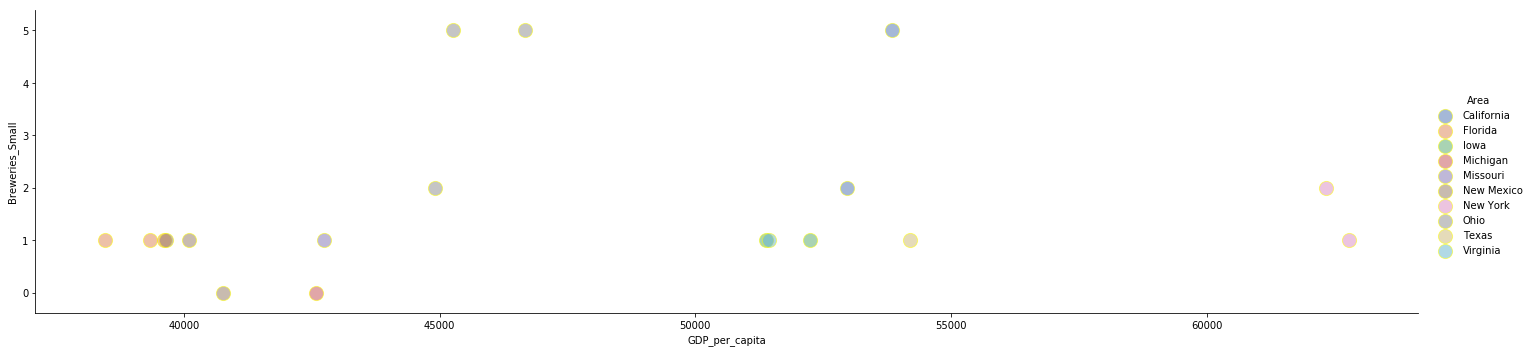

In [419]:

ax = sns.lmplot(x = 'GDP_per_capita', y = 'Breweries_Small', data = small_pop[small_pop['County'] =='061'],  hue = 'Area', palette = "deep", fit_reg = False, height = 5, aspect = 4, scatter_kws = {'alpha': .5, "s": 200, "edgecolors" :'yellow'})


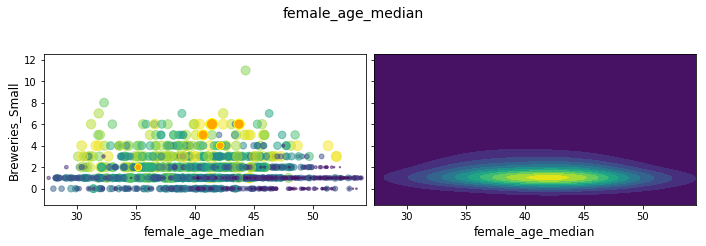

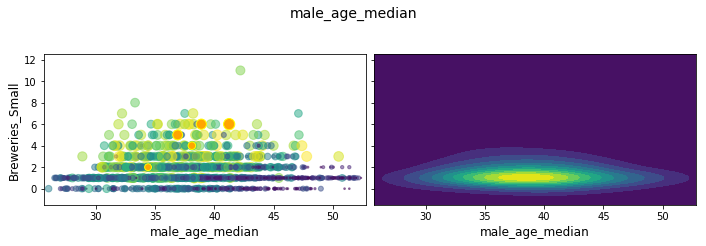

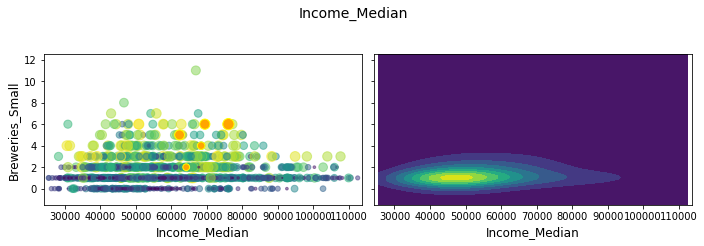

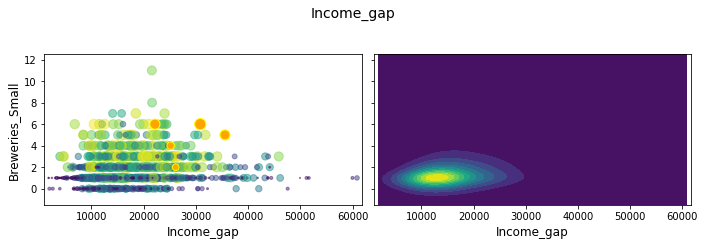

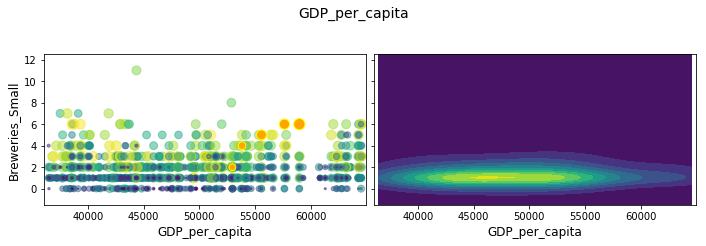

In [344]:
small_pop = nn_df[nn_df['Population'] < 100000]

bubble_kde_subplots(small_pop, 'Breweries_Small', ['female_age_median', 'male_age_median', 'Income_Median', 'Income_gap', 'GDP_per_capita'], 'Population', 1000, 'Population', 'viridis',.5, .5)
#plt.savefig('demographic_kdes.png', bbox_inches = 'tight')

In [353]:
type(fig_list)

NoneType

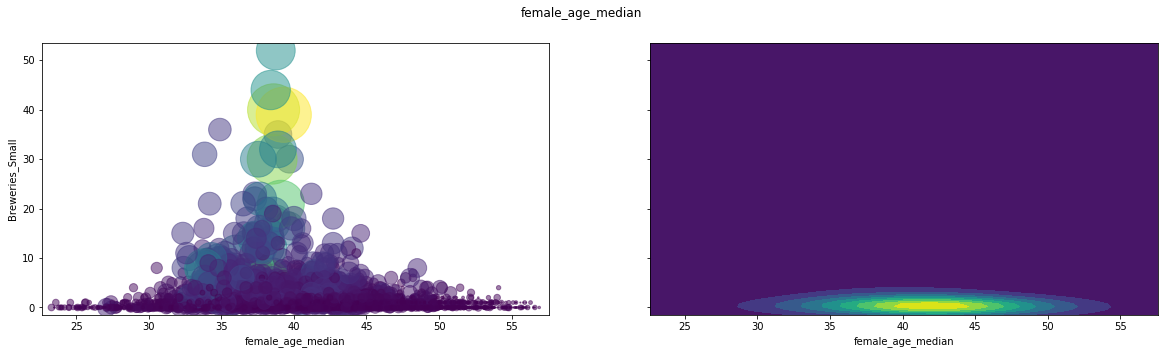

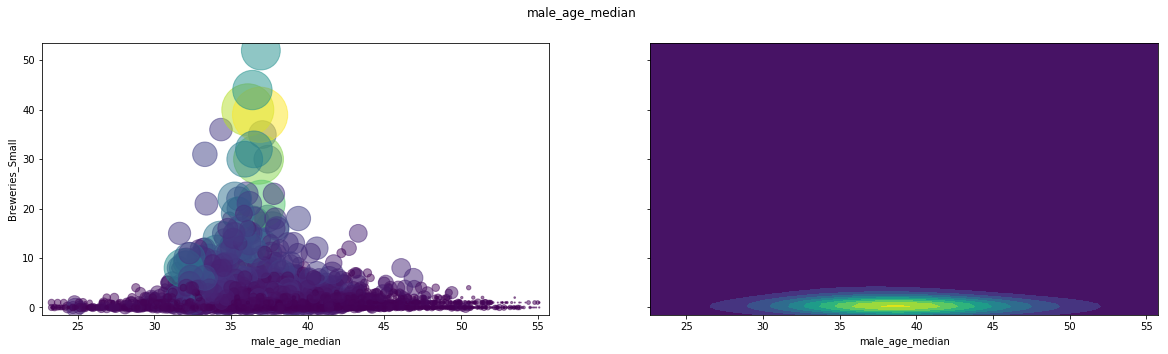

In [52]:
bubble_kde_subplots(df, 'Breweries_Small', ['female_age_median', 'male_age_median'], 'Population',1000, 'Population', 'viridis', .5, .5)

In [57]:
df.reset_index(inplace = True)

In [402]:
state_year = df.groupby(['Area', 'Year']).agg({'Breweries_Small': 'sum'})

In [403]:
state_totals = df.groupby('Area').agg({'Breweries_Small': 'sum'})

In [404]:
state_year.reset_index(inplace = True)

In [405]:
top_ten = list(state_totals.nlargest(10, 'Breweries_Small').index)

In [162]:
top_df = state_year[state_year['Area'].isin(top_ten)]

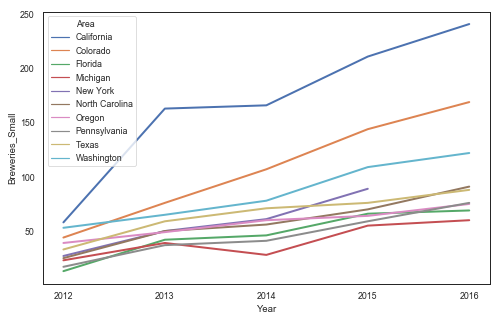

In [183]:
ax = sns.lineplot(x = 'Year', y = 'Breweries_Small', data = top_df, hue = 'Area', linewidth = 2)
sns.set(style= 'white', context = 'paper')
ax.figure.set_size_inches(8, 5)

plt.savefig('topstates.png',bbox_inches = 'tight')
plt.show()

In [180]:
#create correlation matrix
corr = nn_df.corr()

#create a mask that will cover up the other half of the square (the duplicate squares) to make a triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True

#set up plot and plotsize (i think making it a subplot makes it easier to change up sizing, seaborn sizing is pain in the butt)
sns.set_context(font_scale = 2)
f, ax = plt.subplots(figsize = (40, 40))

#diverging palette to see positives and negatives
cmap = sns.diverging_palette(220, 10, as_cmap = True)
#the heat map
ax = sns.heatmap(corr, mask = mask, cmap = cmap, square = True, linewidths = .5 ,cbar_kws = {'shrink':.5})

#changing up fontsizes 
ax.figure.axes[-1].tick_params(labelsize = 25)
ax.tick_params(labelsize = 20)

#adding yellow box to outline target variable
ax.add_patch(Rectangle((0,49), 49, 1, fill = False, edgecolor = 'yellow', lw = 3))
ax.add_patch(Rectangle((49,50), 1, 9, fill = False, edgecolor = 'yellow', lw = 3))

#saving figure
plt.savefig("corr_heatmap.png", bbox_inches = 'tight')

In [420]:
df.to_csv('../capstone_data/county_df.csv')

come up with proxy variable to test hypothesis that recreation impacts brewery count, anti-fun, and fun index. compare with result. 